In [ ]:
%matplotlib inline
from PIL import Image # carregar a imagem das árvores

import random # gerar valores aleatórios

from itertools import permutations # Permutações

import networkx as nx
import matplotlib.pyplot as plt # plot gráficos
import numpy as np # biblioteca numerica python

# Grafos

Um grafo é uma estrutura de dados abstrata usada para representar relações entre objetos. É composto de dois elementos fundamentais: vértices (V) (também chamados de nós ou pontos) e arestas (E) (ou linhas) que conectam pares de vértices. Dentro do campo da matemática e da ciência da computação, os grafos são utilizados para modelar uma ampla variedade de sistemas no mundo real, onde muitos problemas complexos podem ser representados como redes de interconexões entre diferentes entidades.

Representado por $G(V,E)$.

## Tipos de Grafos?

1. Grafo simples: Um grafo que não permite laços (arestas conectando um vértice a ele mesmo) e onde no máximo uma aresta pode existir entre qualquer par de vértices.

2. Grafos completos: Todo par de vértices distintos é interligado por uma única aresta.

3. Grafo não dirigido: As arestas não têm direção. Isso significa que se existe uma aresta entre os vértices
A e B, então A é adjacente a B e B é adjacente a A.

4. Grafo dirigido (digrafo): As arestas têm direção. Se existe uma aresta direcionada do vértice A para o vértice B, A é considerado adjacente a B, mas
B não é necessariamente adjacente a A.

5. Grafo ponderado: As arestas têm pesos associados. Esses pesos podem representar, por exemplo, o custo ou a distância entre dois nós conectados.

6. Multigrafo: Pode possuir múltiplas arestas entre o mesmo par de vértices e também permitir laços.



## Representação de Grafos

Grafos podem ser representados de várias maneiras em um computador:

- Lista de adjacências: cada vértice possui uma lista das arestas que o conectam a outros vértices.
- Matriz de adjacências: uma matriz 2D onde a entrada [i][j] tem um valor específico (por exemplo, 1 ou 0, ou o peso da aresta) para indicar a presença de uma aresta entre os vértices i e j.
- Lista de arestas: uma lista que contém todos os pares de vértices que são conectados por arestas.

## Grafo Simples

Para implementar um grafo simples, vamos criar uma classe que represente um grafo sem laços e com no máximo uma aresta entre qualquer par de vértices. Vamos usar um dicionário para armazenar os vértices e suas adjacências, garantindo que não existam arestas múltiplas entre dois vértices e que não existam laços.

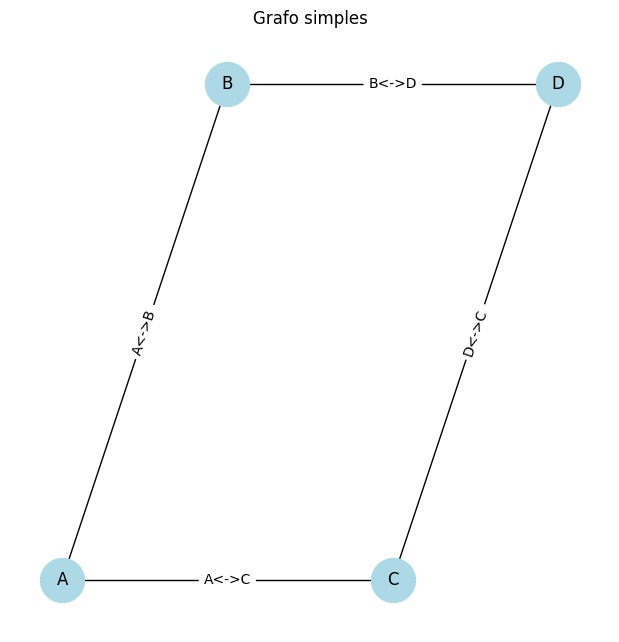

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria um grafo dirigido
G = nx.Graph()

# Adiciona nós com posições no plano cartesiano (x, y)
V = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2)
}
E = [('A', 'B'), ('B', 'D'), ('D', 'C'), ('C', 'A')]
# Adiciona arestas entre os nós
G.add_edge(E[0][0], E[0][1])
G.add_edge(E[1][0], E[1][1])
G.add_edge(E[2][0], E[2][1])
G.add_edge(E[3][0], E[3][1])

# Desenha o grafo com as posições definidas
plt.figure(figsize=(6, 6))
nx.draw(G, V, with_labels=True, node_color='lightblue', node_size=1000)
nx.draw_networkx_edge_labels(G, V, edge_labels={(u, v): f"{u}<->{v}" for u, v in G.edges})
plt.grid(True)
plt.title("Grafo simples")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

A -> ['B', 'F']
B -> ['A', 'C']
C -> ['B', 'D', 'F']
D -> ['C', 'E']
E -> ['D', 'F']
F -> ['E', 'C', 'A']


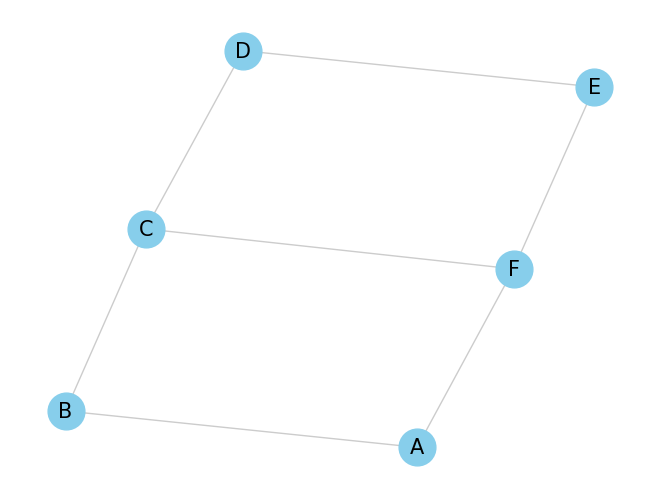

In [ ]:
# Implementação Grafo Simples
class GrafoSimples:
    def __init__(self):
        self.grafo = {}

    def adiciona_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def adiciona_aresta(self, vertice1, vertice2):
        if vertice1 == vertice2:
            print("Laços não são permitidos em um grafo simples.")
            return
        if vertice1 not in self.grafo:
            self.adiciona_vertice(vertice1)
        if vertice2 not in self.grafo:
            self.adiciona_vertice(vertice2)
        if vertice2 not in self.grafo[vertice1]:
            self.grafo[vertice1].append(vertice2)
        if vertice1 not in self.grafo[vertice2]:
            self.grafo[vertice2].append(vertice1)

    def mostra_grafo(self):
        for vertice, adjacencias in self.grafo.items():
            print(f"{vertice} -> {adjacencias}")

    def plot_grafo(self):
        G = nx.Graph()
        for vertice, adjacencias in self.grafo.items():
            for adj in adjacencias:
                G.add_edge(vertice, adj)
        pos = nx.spring_layout(G)  # Layout para uma boa distribuição dos nós
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='#CCCCCC', linewidths=1, font_size=15)
        plt.show()

# Exemplo de uso
grafo = GrafoSimples()
grafo.adiciona_vertice("A")
grafo.adiciona_vertice("B")
grafo.adiciona_vertice("C")
grafo.adiciona_vertice("D")
grafo.adiciona_vertice("E")
grafo.adiciona_vertice("F")

grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("D", "E")
grafo.adiciona_aresta("E", "F")
grafo.adiciona_aresta("C", "F")
grafo.adiciona_aresta("F", "A")



grafo.mostra_grafo()
grafo.plot_grafo()


## Grafo Completo

Um grafo completo é um tipo de grafo onde cada par de vértices distintos é conectado por uma única aresta. Em outras palavras, todos os vértices são adjacentes entre si. Para implementar um grafo completo em Python, podemos criar uma classe que facilite a adição de vértices e automaticamente conecte cada novo vértice a todos os vértices já existentes no grafo.

A -> ['B', 'C', 'D', 'E', 'F']
B -> ['A', 'C', 'D', 'E', 'F']
C -> ['A', 'B', 'D', 'E', 'F']
D -> ['A', 'B', 'C', 'E', 'F']
E -> ['A', 'B', 'C', 'D', 'F']
F -> ['A', 'B', 'C', 'D', 'E']


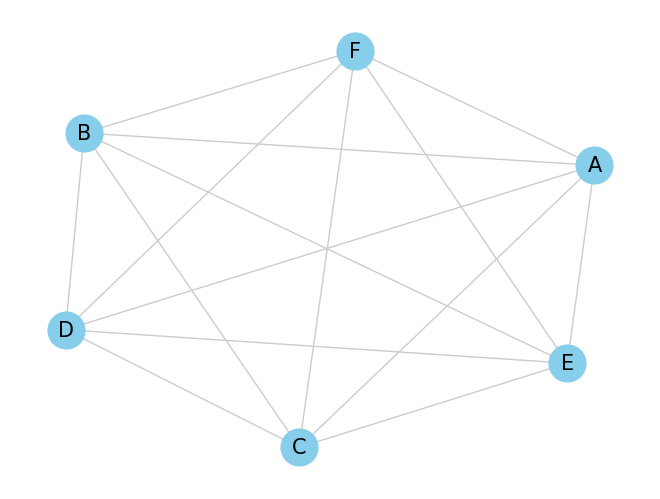

In [ ]:
# Implementação Grafo Completo
class GrafoCompleto:
    def __init__(self):
        self.grafo = {}

    def adiciona_vertice(self, vertice):
        if vertice in self.grafo:
            print("Vértice já existe.")
            return
        # Conecta o novo vértice a todos os vértices existentes
        for v in self.grafo:
            self.grafo[v].append(vertice)
        # Adiciona o novo vértice com conexões a todos os outros
        self.grafo[vertice] = list(self.grafo.keys())

    def mostra_grafo(self):
        for vertice, adjacencias in self.grafo.items():
            print(f"{vertice} -> {adjacencias}")

    def plot_grafo(self):
        G = nx.Graph()
        for vertice, adjacencias in self.grafo.items():
            for adj in adjacencias:
                G.add_edge(vertice, adj)
        pos = nx.spring_layout(G)  # Layout para uma boa distribuição dos nós
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='#CCCCCC', linewidths=1, font_size=15)
        plt.show()

# Exemplo de uso
grafo = GrafoCompleto()
grafo.adiciona_vertice("A")
grafo.adiciona_vertice("B")
grafo.adiciona_vertice("C")
grafo.adiciona_vertice("D")
grafo.adiciona_vertice("E")
grafo.adiciona_vertice("F")

grafo.mostra_grafo()
grafo.plot_grafo()


## Grafo não dirigido

Para implementar um grafo não dirigido em Python, podemos utilizar uma estrutura de dados baseada em dicionários para representar as adjacências entre os vértices. Aqui, cada chave do dicionário será um vértice, e o valor associado a essa chave será uma lista que contém todos os vértices conectados a ele por uma aresta.

### Exemplo e implementação:

A -> ['B', 'D']
B -> ['A', 'C']
C -> ['B', 'D']
D -> ['C', 'A']


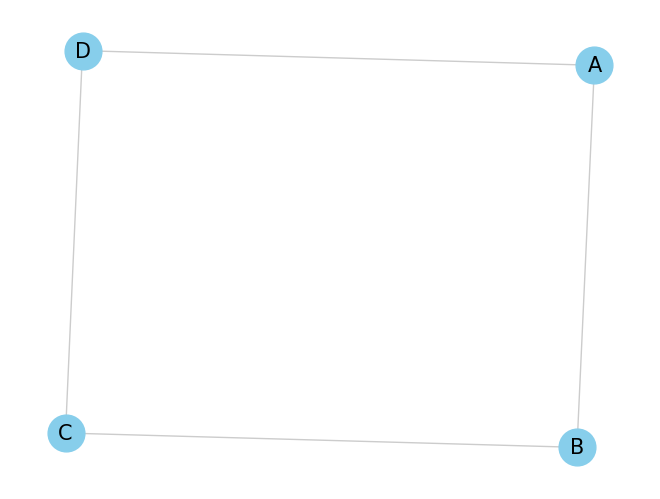

In [ ]:
# Implementação Grafo Não Dirigido
class GrafoNaoDirigido:
    def __init__(self):
        self.grafo = {}

    def adiciona_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def adiciona_aresta(self, vertice1, vertice2):
        if vertice1 in self.grafo and vertice2 in self.grafo:
            self.grafo[vertice1].append(vertice2)
            self.grafo[vertice2].append(vertice1)
        else:
            print(f"Um ou ambos os vértices {vertice1}, {vertice2} não existem no grafo!")

    def mostra_grafo(self):
        for vertice in self.grafo:
            print(f"{vertice} -> {self.grafo[vertice]}")

    def plot_grafo(self):
        G = nx.Graph()
        for vertice, adjacencias in self.grafo.items():
            for adj in adjacencias:
                G.add_edge(vertice, adj)
        pos = nx.spring_layout(G)  # Layout para uma boa distribuição dos nós
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='#CCCCCC', linewidths=1, font_size=15)
        plt.show()

# Exemplo de uso
grafo = GrafoNaoDirigido()
grafo.adiciona_vertice("A")
grafo.adiciona_vertice("B")
grafo.adiciona_vertice("C")
grafo.adiciona_vertice("D")

grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("D", "A")

grafo.mostra_grafo()
grafo.plot_grafo()


## Grafo Dirigido

Para implementar um grafo dirigido em Python, podemos utilizar uma estrutura de dados baseada em dicionários para representar as adjacências entre os vértices, similar ao exemplo anterior, mas ajustando para que as conexões sejam unidirecionais.

A -> ['B']
B -> ['C']
C -> ['D']
D -> ['C', 'A']


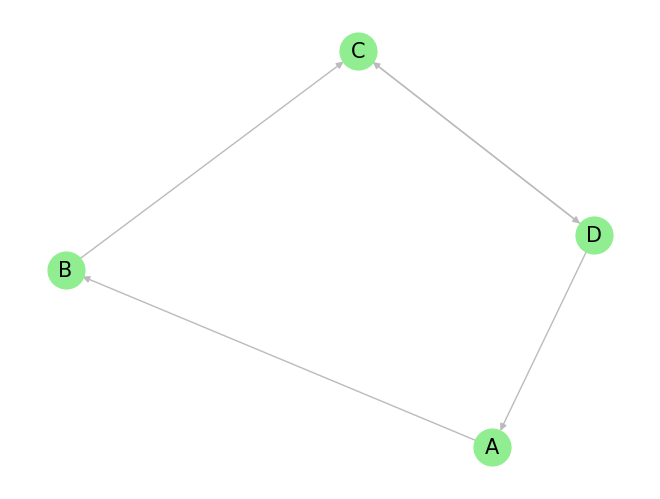

In [ ]:
# Implementação Grafo Dirigido
class GrafoDirigido:
    def __init__(self):
        self.grafo = {}

    def adiciona_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def adiciona_aresta(self, origem, destino):
        if origem in self.grafo:
            self.grafo[origem].append(destino)
        else:
            self.grafo[origem] = [destino]
            if destino not in self.grafo:
                self.grafo[destino] = []

    def mostra_grafo(self):
        for vertice in self.grafo:
            print(f"{vertice} -> {self.grafo[vertice]}")

    def plot_grafo(self):
        G = nx.DiGraph()  # Utilizando DiGraph para representar um grafo dirigido
        for vertice, adjacencias in self.grafo.items():
            for destino in adjacencias:
                G.add_edge(vertice, destino)
        pos = nx.spring_layout(G)  # Layout para uma boa distribuição dos nós
        nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='#BBBBBB', linewidths=1, font_size=15)
        plt.show()

# Exemplo de uso
grafo = GrafoDirigido()
grafo.adiciona_vertice("A")
grafo.adiciona_vertice("B")
grafo.adiciona_vertice("C")
grafo.adiciona_vertice("D")

grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("D", "C")
grafo.adiciona_aresta("D", "A")  # adicionando uma aresta que cria um ciclo

grafo.mostra_grafo()
grafo.plot_grafo()


## Grafos ponderado

### Os grados ponderados podem ser:
    - Dirigidos;
    - Não dirigidos.

Em um grafo dirigido, cada aresta além de conectar dois vértices, também terá um peso associado. Um grafo ponderado pode ser tanto dirigido quanto não dirigido, baseado em um parâmetro passado durante a inicialização. A representação usará um dicionário, onde cada vértice aponta para outro dicionário que mapeia os vértices de destino e seus respectivos pesos.





In [ ]:
# Implementação Grafo Ponderado
class GrafoPonderado:
    def __init__(self, dirigido=False):
        self.grafo = {}
        self.dirigido = dirigido

    def adiciona_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = {}

    def adiciona_aresta(self, origem, destino, peso):
        if origem not in self.grafo:
            self.adiciona_vertice(origem)
        if destino not in self.grafo:
            self.adiciona_vertice(destino)

        self.grafo[origem][destino] = peso
        if not self.dirigido:
            self.grafo[destino][origem] = peso

    def mostra_grafo(self):
        for vertice in self.grafo:
            print(f"{vertice} -> {self.grafo[vertice]}")

    def plot_grafo(self):
        G = nx.DiGraph() if self.dirigido else nx.Graph()
        for origem, destinos in self.grafo.items():
            for destino, peso in destinos.items():
                G.add_edge(origem, destino, weight=peso)

        pos = nx.spring_layout(G)  # Layout para uma boa distribuição dos nós
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels=True, node_color='orange', node_size=700, edge_color='gray', linewidths=1, font_size=15)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()




# Exemplo de uso do Grafo Ponderado Não Dirigido

No grafo não dirigido o caminho pode ser percorrido seguindo a conexão de A-B ou de B-A.

A -> {'B': 3, 'C': 7, 'D': 5}
B -> {'A': 3, 'C': 1}
C -> {'A': 7, 'B': 1, 'D': 2}
D -> {'C': 2, 'A': 5}


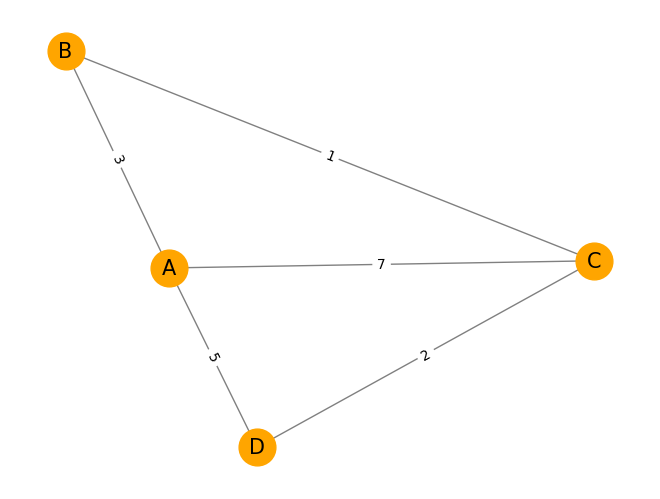

In [ ]:
# Exemplo de uso
grafo = GrafoPonderado(dirigido=False)
grafo.adiciona_vertice("A")
grafo.adiciona_vertice("B")
grafo.adiciona_vertice("C")
grafo.adiciona_vertice("D")

grafo.adiciona_aresta("A", "B", 3)
grafo.adiciona_aresta("A", "C", 7)
grafo.adiciona_aresta("B", "C", 1)
grafo.adiciona_aresta("C", "D", 2)
grafo.adiciona_aresta("D", "A", 5)

grafo.mostra_grafo()
grafo.plot_grafo()

## Exemplo de uso do Grafo Ponderado Dirigido

vamos criar um cenário de um grafo com vértices que representam cidades e as arestas dirigidas com pesos que representam as distâncias entre essas cidades. Este exemplo ajudará a visualizar como o código funciona em uma aplicação prática.

 - RJ - Rio de Janeiro
 - SP - São paulo
 - BH - Belo Horizonte
 - CBA - Curitiba

SP -> {'RJ': 429}
RJ -> {'BH': 434}
BH -> {'CBA': 586}
CBA -> {'SP': 408}


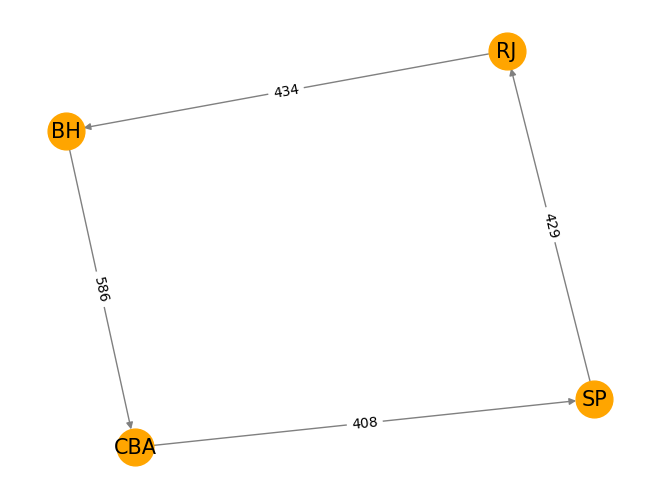

In [ ]:
# Exemplo de uso do Grafo Ponderado Dirigido
grafo = GrafoPonderado(dirigido=True)

# Adicionando vértices que representam cidades
grafo.adiciona_vertice("SP")
grafo.adiciona_vertice("RJ")
grafo.adiciona_vertice("BH")
grafo.adiciona_vertice("CBA")

# Adicionando arestas dirigidas com pesos que representam as distâncias em km
grafo.adiciona_aresta("SP", "RJ", 429)
grafo.adiciona_aresta("RJ", "BH", 434)
grafo.adiciona_aresta("BH", "CBA", 586)
grafo.adiciona_aresta("CBA", "SP", 408)

# Mostrar o grafo textualmente
grafo.mostra_grafo()

# Plotar o grafo visualmente
grafo.plot_grafo()


## Grafo Multigrafo

Um multigrafo é uma estrutura que permite múltiplas arestas entre o mesmo par de vértices e pode incluir laços (arestas que conectam um vértice a ele mesmo). Para implementar um multigrafo em Python, vou criar uma classe que utilize um dicionário de listas para armazenar as adjacências, permitindo que múltiplas conexões entre os mesmos vértices sejam representadas.

A -> ['B', 'C', 'C', 'B', 'A']
B -> ['A', 'B', 'C', 'A']
C -> ['A', 'B', 'A', 'D']
D -> ['C']


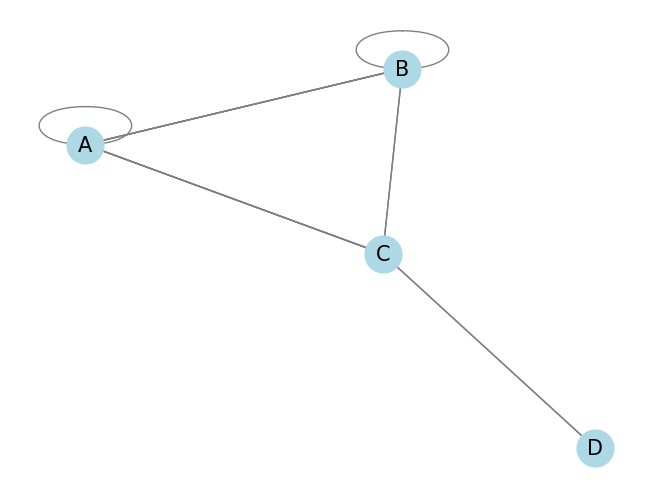

In [ ]:
# Implementação MultiGrafo
class Multigrafo:
    def __init__(self):
        self.grafo = {}

    def adiciona_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def adiciona_aresta(self, vertice1, vertice2):
        if vertice1 not in self.grafo:
            self.adiciona_vertice(vertice1)
        if vertice2 not in self.grafo:
            self.adiciona_vertice(vertice2)
        self.grafo[vertice1].append(vertice2)
        if vertice1 != vertice2:
            self.grafo[vertice2].append(vertice1)

    def mostra_grafo(self):
        for vertice, adjacencias in self.grafo.items():
            print(f"{vertice} -> {adjacencias}")

    def plot_grafo(self):
        G = nx.MultiGraph()  # MultiGraph permite múltiplas arestas entre dois nós
        for vertice, adjacencias in self.grafo.items():
            for adjacente in adjacencias:
                G.add_edge(vertice, adjacente)

        pos = nx.spring_layout(G)  # Layout para uma boa distribuição dos nós
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', linewidths=1, font_size=15)
        plt.show()

# Exemplo de uso
grafo = Multigrafo()
grafo.adiciona_vertice("A")
grafo.adiciona_vertice("B")
grafo.adiciona_vertice("C")
grafo.adiciona_vertice("D")

grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "B")
grafo.adiciona_aresta("A", "C")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("A", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("A", "B")  # Adicionando uma segunda aresta entre A e B
grafo.adiciona_aresta("A", "A")  # Adicionando um laço em A

grafo.mostra_grafo()
grafo.plot_grafo()


# Capitulo 2

## Caminhos em grafos

Caminhos em grafos são conceitos fundamentais na teoria dos grafos e têm diversas aplicações práticas, como em redes de computadores, planejamento de rotas, análise de redes sociais, e muito mais. Vamos explorar os principais tipos de caminhos em grafos e como eles são usados.

Tipos de Caminhos em Grafos
- Caminho Simples: Um caminho que passa por vértices sem repeti-los. Em um caminho simples, exceto, talvez, pelo vértice inicial e final, nenhum outro vértice é revisitado.

- Caminho Euleriano: Um caminho que passa por cada aresta de um grafo exatamente uma vez. Se um caminho Euleriano começa e termina no mesmo vértice, ele é chamado de circuito ou ciclo Euleriano. Um grafo é Euleriano se possui um ciclo Euleriano.

- Caminho Hamiltoniano: Um caminho que passa por cada vértice do grafo exatamente uma vez. Se um caminho Hamiltoniano começa e termina no mesmo vértice, ele é chamado de ciclo Hamiltoniano. Diferentemente dos caminhos Eulerianos, determinar se um dado grafo possui um caminho Hamiltoniano é um problema NP-completo.

- Caminho mais curto: O caminho que possui o menor comprimento (ou custo, peso) entre dois vértices. Esse tipo de caminho é fundamental em algoritmos de roteamento e planejamento, onde custos podem representar distância, tempo, ou qualquer outra métrica que define uma "distância" entre pontos.

## Algoritmos para Encontrar Caminhos
- Algoritmo de Dijkstra: Utilizado para encontrar o caminho mais curto entre um vértice e todos os outros vértices em um grafo ponderado, onde os pesos das arestas são não negativos.

- Algoritmo de Bellman-Ford: Similar ao Dijkstra, mas pode ser usado em grafos que contêm arestas com pesos negativos.

- Algoritmo de Floyd-Warshall: Encontra o menor caminho entre todos os pares de vértices em um grafo ponderado. Útil em análises de rede onde todas as distâncias internodais são necessárias.

- Busca em Largura (BFS): Ideal para encontrar o caminho mais curto em um grafo não ponderado ou para determinar a distância entre dois vértices.

- Busca em Profundidade (DFS): Não garante o caminho mais curto, mas pode ser usado para verificar a conectividade e explorar possíveis caminhos em um grafo.

## Aplicações de Caminhos em Grafos
 - Redes de Transporte: Planejamento de rotas onde caminhos mais curtos ou caminhos que maximizam a eficiência são necessários.
 - Telecomunicações: Gerenciamento de redes onde rotas eficientes são críticas para a minimização de latência e custo.
 - Planejamento Urbano: Análise de fluxo de tráfego e projetos de infraestrutura viária.
 - Ciência de Redes: Estudo de redes sociais, biológicas e de informação, onde caminhos podem representar transferência de informações ou caminhos de doenças.

Caminho Simples de A para D: ['A', 'B', 'C', 'D']


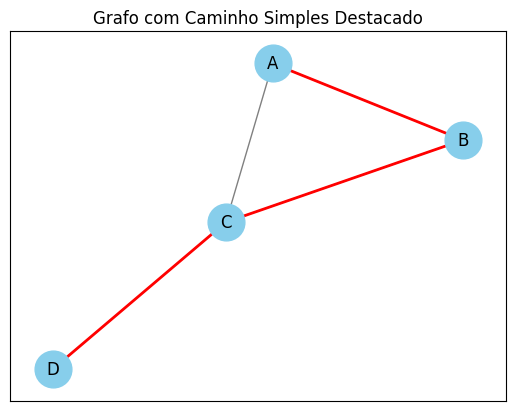

In [ ]:
# Implementação de caminhos em Grafo Simples

class GrafoSimples:
    def __init__(self):
        self.grafo = nx.Graph()

    def adiciona_aresta(self, u, v):
        self.grafo.add_edge(u, v)

    def encontra_caminho_simples(self, inicio, fim, caminho=[]):
        caminho = caminho + [inicio]
        if inicio == fim:
            return caminho
        if inicio not in self.grafo:
            return None
        for vizinho in self.grafo.neighbors(inicio):
            if vizinho not in caminho:
                caminho_estendido = self.encontra_caminho_simples(vizinho, fim, caminho)
                if caminho_estendido:
                    return caminho_estendido
        return None

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Posições para todos os nós
        # Desenha os nós
        nx.draw_networkx_nodes(self.grafo, pos, node_color='skyblue', node_size=700)
        # Desenha todas as arestas
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray')
        # Desenha as arestas do caminho, se houver
        if caminho:
            caminho_edges = [(caminho[n], caminho[n+1]) for n in range(len(caminho) - 1)]
            nx.draw_networkx_edges(self.grafo, pos, edgelist=caminho_edges, edge_color='red', width=2)
        # Rótulos
        nx.draw_networkx_labels(self.grafo, pos)
        plt.title('Grafo com Caminho Simples Destacado')
        plt.show()

# Exemplo de uso
grafo = GrafoSimples()
grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("A", "C")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")


caminho = grafo.encontra_caminho_simples("A", "D")
print("Caminho Simples de A para D:", caminho)
grafo.plot_grafo(caminho)



## grafos Eulerianos

A teoria dos grafos Eulerianos foca no estudo de trajetos em grafos que utilizam cada aresta exatamente uma vez. Esta área da matemática e da ciência da computação é extremamente útil em várias aplicações práticas, desde a otimização de rotas até a organização de circuitos eletrônicos. Um caminho Euleriano atravessa cada aresta de um grafo exatamente uma vez, enquanto um ciclo Euleriano retorna ao ponto de partida após percorrer todas as arestas uma vez.

### Definição e Propriedades
#### Caminho Euleriano:

 - Um caminho que usa cada aresta do grafo exatamente uma vez.
 - Não necessariamente retorna ao ponto de partida.

#### Ciclo Euleriano:

 - Um ciclo que começa e termina no mesmo vértice, usando cada aresta exatamente uma vez.

## Condições para Grafos Eulerianos
### Condições para Ciclo Euleriano:

 - Um grafo não direcionado tem um ciclo Euleriano se, e somente se, todos os vértices têm grau par e o grafo é conexo (ignorando vértices isolados).
 - Um grafo direcionado tem um ciclo Euleriano se, e somente se, em cada vértice, o grau de entrada é igual ao grau de saída, e todos os vértices com arestas não nulas pertencem à mesma componente fortemente conexa.

### Condições para Caminho Euleriano:

 - Um grafo não direcionado tem um caminho Euleriano se, e somente se, possui exatamente dois vértices de grau ímpar (que serão os extremos do caminho) e todas as arestas estão em uma única componente conexa.
 - Um grafo direcionado tem um caminho Euleriano se, e somente se, possui no máximo um vértice com (grau de saída - grau de entrada = 1) (início do caminho), no máximo um vértice com (grau de entrada - grau de saída = 1 ) (fim do caminho), e todos os vértices com arestas não nulas estão conectados.

### Algoritmos
O problema de encontrar um ciclo ou caminho Euleriano pode ser resolvido eficientemente usando algoritmos específicos:

#### Algoritmo de Hierholzer (1873):

 - Utilizado para encontrar ciclos Eulerianos ou caminhos.
 - O processo basicamente começa em um vértice arbitrário, seguindo arestas até retornar ao vértice inicial formando um ciclo. Se houver arestas não visitadas, o ciclo é expandido até que todas as arestas sejam utilizadas

#### Algoritmo de Fleury:

 - Uma abordagem mais cautelosa que evita criar pontes a menos que absolutamente necessário, garantindo que o caminho possa ser continuado.

#### Aplicações
 - Logística e Roteamento: Grafos Eulerianos são ideais para planejar rotas que precisam cobrir certas ruas ou caminhos exatamente uma vez, como na coleta de lixo ou na entrega de correspondências.
 - Biologia Computacional: Usados para encontrar caminhos em sequenciamento de DNA onde certas sequências (arestas) precisam ser usadas exatamente uma vez.
 - Desenho de Circuitos: Circuitos podem ser projetados para percorrer caminhos que cruzem cada componente uma vez, otimizando o uso de material e espaço.

Caminho Euleriano encontrado: [('A', 'F'), ('F', 'E'), ('E', 'D'), ('D', 'C'), ('C', 'B'), ('B', 'A')]


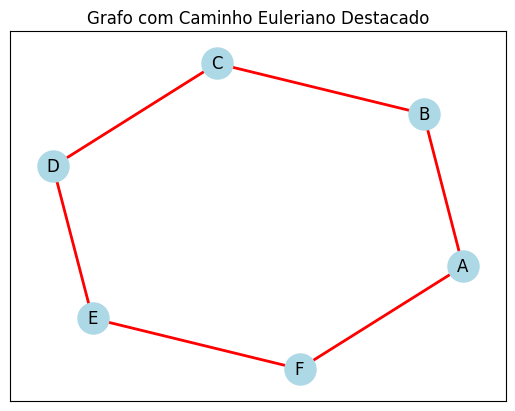

In [ ]:
# Implementação de caminhos em Grafo Eulerianos

class GrafoEuleriano:
    def __init__(self):
        self.grafo = nx.MultiGraph()  # MultiGraph permite múltiplas arestas e laços

    def adiciona_aresta(self, u, v):
        self.grafo.add_edge(u, v)

    def verifica_euleriano(self):
        # Retorna True se o grafo tiver um ciclo Euleriano
        return nx.is_eulerian(self.grafo)

    def encontra_caminho_euleriano(self):
        # Esta função encontra um ciclo Euleriano se existir
        try:
            ciclo = list(nx.eulerian_circuit(self.grafo))
            return ciclo
        except nx.NetworkXError:
            return "O grafo não é Euleriano."

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Layout para uma boa distribuição dos nós
        nx.draw_networkx_nodes(self.grafo, pos, node_color='lightblue', node_size=500)
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray')
        nx.draw_networkx_labels(self.grafo, pos)

        if caminho:
            edges_in_path = [(u, v) for (u, v) in caminho]
            nx.draw_networkx_edges(self.grafo, pos, edgelist=edges_in_path, edge_color='red', width=2)

        plt.title('Grafo com Caminho Euleriano Destacado')
        plt.show()

# Exemplo de uso
grafo = GrafoEuleriano()
grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("D", "E")
grafo.adiciona_aresta("E", "F")
grafo.adiciona_aresta("F", "A")

if grafo.verifica_euleriano():
    caminho = grafo.encontra_caminho_euleriano()
    print("Caminho Euleriano encontrado:", caminho)
    grafo.plot_grafo(caminho)
else:
    print("O grafo não é Euleriano.")


## Grafos Hamiltonianos

A teoria dos grafos Hamiltonianos é uma área fascinante da matemática e da ciência da computação que se dedica ao estudo de ciclos Hamiltonianos em grafos. Um ciclo Hamiltoniano é um ciclo em um grafo que visita cada vértice exatamente uma vez e retorna ao ponto de partida. Um grafo que contém pelo menos um ciclo Hamiltoniano é chamado de grafo Hamiltoniano.

### Origem e História
O conceito de ciclos Hamiltonianos foi inspirado pelo problema do cavaleiro, proposto pelo matemático Sir William Rowan Hamilton em 1859. O problema envolvia mover um cavaleiro em um tabuleiro de xadrez de forma que o cavaleiro visitasse cada quadrado exatamente uma vez.

### Características dos Grafos Hamiltonianos
#### Definição Formal:

- Um ciclo Hamiltoniano é um ciclo fechado que visita cada vértice de um grafo exatamente uma vez, retornando ao vértice de partida.
- Um caminho Hamiltoniano é um caminho que passa por cada vértice exatamente uma vez, mas não precisa retornar ao ponto de origem.

#### Dificuldade de Determinação:

 - Determinar se um grafo dado possui um ciclo Hamiltoniano é um problema NP-completo. Isso significa que não há algoritmo conhecido que possa resolvê-lo em tempo polinomial para todos os grafos gerais, e acredita-se que nenhum algoritmo desse tipo exista.

### Teoremas e Propriedades:

 - Teorema de Dirac (1952): Se um grafo com n vértices (n≥3) é tal que o grau de cada vértice é pelo menos n/2, então o grafo é Hamiltoniano.
   -Teorema de Ore (1960): Em um grafo com n vértices (n≥3), se a soma dos graus de cada par de vértices não adjacentes é n ou mais, o grafo é Hamiltoniano.
   - Essas condições são suficientes mas não necessárias; ou seja, existem grafos Hamiltonianos que não satisfazem essas condições.

### Aplicações:

 - Problema do Caixeiro Viajante: Um dos usos mais famosos de ciclos Hamiltonianos é no problema do caixeiro viajante, onde o objetivo é encontrar o ciclo Hamiltoniano de menor custo em um grafo ponderado. Este problema é fundamental em logística e planejamento de rotas.
 - Planejamento e Agendamento: Ciclos e caminhos Hamiltonianos são utilizados para otimizar rotas em redes de distribuição e em sistemas de transporte.

### Exemplos e Variações
 - Grafos completos: Todo grafo completo (em que cada par de vértices distintos é conectado por uma aresta) é Hamiltoniano, pois é possível começar em qualquer vértice e seguir para os demais em qualquer ordem, retornando ao ponto de partida para completar o ciclo.
 - Grafos Bipartidos: Um grafo bipartido é Hamiltoniano se e somente se é balanceado (ou seja, os dois subconjuntos têm o mesmo número de vértices) e se satisfaz certas condições adicionais de conectividade.

Caminho Hamiltoniano encontrado: ['A', 'B', 'C', 'D', 'A']


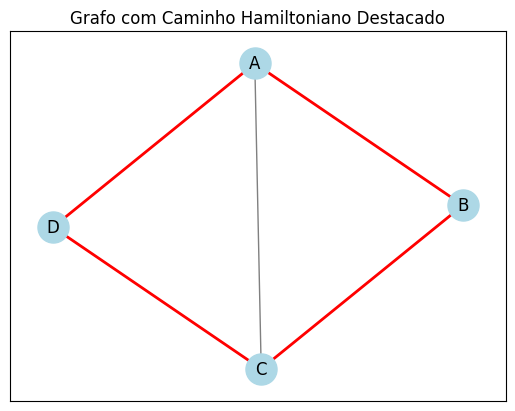

In [ ]:
# Implementação de caminhos em Grafo Hamiltoniano
class GrafoHamiltoniano:
    def __init__(self):
        self.grafo = nx.Graph()

    def adiciona_aresta(self, u, v):
        self.grafo.add_edge(u, v)

    def encontra_caminho_hamiltoniano(self):
        # Verifica todas as permutações possíveis dos vértices para encontrar um caminho Hamiltoniano
        N = len(self.grafo.nodes())
        for permutacao in permutations(self.grafo.nodes()):
            # Verifica se a permutação é um caminho válido
            caminho_valido = True
            for i in range(N - 1):
                if permutacao[i] not in self.grafo[permutacao[i + 1]]:
                    caminho_valido = False
                    break
            if caminho_valido:  # Verifica se o último nó conecta-se ao primeiro para formar um ciclo
                if permutacao[0] in self.grafo[permutacao[-1]]:
                    return list(permutacao) + [permutacao[0]]
                return list(permutacao)
        return None

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Posições para todos os nós
        nx.draw_networkx_nodes(self.grafo, pos, node_color='lightblue', node_size=500)
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray')
        nx.draw_networkx_labels(self.grafo, pos)

        if caminho:
            edges_in_path = [(caminho[n], caminho[n+1]) for n in range(len(caminho) - 1)]
            nx.draw_networkx_edges(self.grafo, pos, edgelist=edges_in_path, edge_color='red', width=2)

        plt.title('Grafo com Caminho Hamiltoniano Destacado')
        plt.show()

# Exemplo de uso
grafo = GrafoHamiltoniano()
grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("D", "A")
grafo.adiciona_aresta("A", "C")

caminho = grafo.encontra_caminho_hamiltoniano()
if caminho:
    print("Caminho Hamiltoniano encontrado:", caminho)
    grafo.plot_grafo(caminho)
else:
    print("Não foi possível encontrar um caminho Hamiltoniano.")


## Caminho mais curto em um grafo

Para visualizar um caminho mais curto em um grafo usaremos o Algoritmo de Dijkstra, que é comumente usado para encontrar o caminho mais curto em grafos ponderados, mas para grafos não ponderados, podemos usar a Busca em Largura (BFS) que também é eficaz.

Caminho mais curto de A para E: ['A', 'B', 'C']


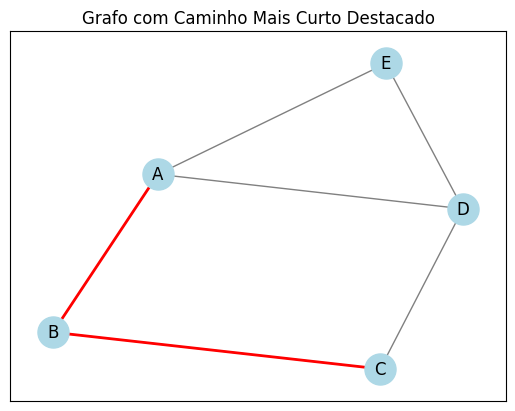

In [ ]:
# Implementação de caminhos mais curto em grafo

class Grafo:
    def __init__(self):
        self.grafo = nx.Graph()

    def adiciona_aresta(self, u, v):
        self.grafo.add_edge(u, v)

    def encontra_caminho_mais_curto(self, origem, destino):
        # Utiliza a função de caminho mais curto de networkx para grafos não ponderados
        try:
            caminho = nx.shortest_path(self.grafo, source=origem, target=destino)
            return caminho
        except nx.NetworkXNoPath:
            print("Não há caminho entre", origem, "e", destino)
            return None

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Posições para todos os nós
        nx.draw_networkx_nodes(self.grafo, pos, node_color='lightblue', node_size=500)
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray')
        nx.draw_networkx_labels(self.grafo, pos)

        if caminho:
            path_edges = list(zip(caminho, caminho[1:]))
            nx.draw_networkx_edges(self.grafo, pos, edgelist=path_edges, edge_color='red', width=2)

        plt.title('Grafo com Caminho Mais Curto Destacado')
        plt.show()

# Exemplo de uso
grafo = Grafo()
grafo.adiciona_aresta("A", "B")
grafo.adiciona_aresta("B", "C")
grafo.adiciona_aresta("C", "D")
grafo.adiciona_aresta("D", "E")
grafo.adiciona_aresta("A", "D")
grafo.adiciona_aresta("A", "E")

caminho = grafo.encontra_caminho_mais_curto("A", "C")
if caminho:
    print("Caminho mais curto de A para E:", caminho)
    grafo.plot_grafo(caminho)
else:
    print("Não foi possível encontrar um caminho mais curto.")


## Algoritmo de Bellman-Ford

O Algoritmo de Bellman-Ford é um método clássico na teoria dos grafos utilizado para calcular o caminho mais curto de um único vértice de origem para todos os outros vértices em um grafo que pode conter arestas com pesos negativos. Diferentemente do Algoritmo de Dijkstra, que também serve para encontrar o caminho mais curto mas só pode ser aplicado a grafos sem arestas negativas, o Bellman-Ford é capaz de lidar com grafos que possuem pesos negativos nas arestas e ainda detectar ciclos de peso negativo no grafo.

## Funcionamento do Algoritmo
O algoritmo, desenvolvido por Richard Bellman e Lester Ford Jr., é baseado no princípio de relaxamento de arestas, onde a estimativa de menor caminho é continuamente melhorada até alcançar a solução ótima ou determinar que um ciclo de peso negativo está presente.

## Etapas do Algoritmo
### Inicialização:

 - Inicialize a distância para o vértice de origem como zero e para todos os outros vértices como infinito.

### Relaxamento:

- Para cada aresta do grafo, atualize o custo do caminho se um caminho mais curto através dessa aresta for encontrado. Isto é, para cada aresta (u,v) com peso w, se a distância até u somada ao peso w for menor que a distância estimada até v, então atualize a distância até v.
 - Este processo é repetido V-1 vezes, onde V é o número de vértices no grafo. A razão para repetir V - 1 vezes é que o caminho mais longo sem ciclos em qualquer grafo tem no máximo V - 1 arestas.

### Checagem de Ciclo Negativo:

Após as V−1 iterações, o algoritmo verifica cada aresta novamente. Se qualquer distância puder ser reduzida nesta etapa, então um ciclo de peso negativo está presente no grafo.
Isto é importante porque a presença de um ciclo de peso negativo significa que não há solução mínima definida - o caminho pode sempre ser reduzido circulando pelo ciclo.

### Complexidade e Características

- Complexidade Temporal: O algoritmo possui uma complexidade temporal de O(VE), onde V é o número de vértices e E é o número de arestas. Isso o torna menos eficiente que o Algoritmo de Dijkstra para grafos sem arestas negativas.

 - Complexidade Espacial: O algoritmo necessita de espaço para armazenar distâncias, predecessores, e uma lista de todas as arestas, totalizando uma complexidade espacial de O(V+E).

### Vantagens e Desvantagens

#### Vantagens:

 - Capaz de lidar com grafos que possuem arestas de peso negativo.
 - Pode detectar ciclos de peso negativo, o que é útil para diagnóstico de sistemas que não deveriam ter tais ciclos.

#### Desvantagens:

- Menos eficiente que o Algoritmo de Dijkstra quando não há arestas de peso negativo.
 - Não pode resolver o problema do caminho mais curto se houver um ciclo de peso negativo acessível a partir do vértice de origem.

### Aplicações
 - Redes de Telecomunicações: Otimização de rotas em redes que podem incluir custos de configuração negativos.
 - Sistemas Financeiros: Avaliação de ciclos de transações financeiras que podem levar a oportunidades de arbitragem (indicadas por ciclos de peso negativo).
 - Modelagem de Sistemas Econômicos: Análise de modelos que podem incluir transferências ou subsídios que efetivamente reduzem custos (pesos negativos).

Distâncias: {'A': 0, 'B': -1, 'C': 2}


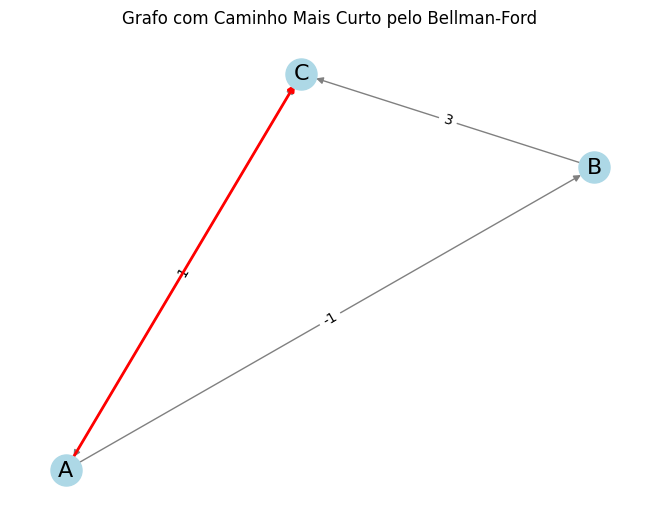

In [ ]:
# Implementação do Algoritmo de Bellman Ford

class GrafoBellmanFord:
    def __init__(self):
        self.grafo = nx.DiGraph()

    def adiciona_aresta(self, u, v, peso):
        self.grafo.add_edge(u, v, weight=peso)

    def bellman_ford(self, origem):
        # Inicialização
        distancias = {v: float('inf') for v in self.grafo.nodes()}
        predecessores = {v: None for v in self.grafo.nodes()}
        distancias[origem] = 0

        # Relaxamento das arestas
        for _ in range(len(self.grafo.nodes()) - 1):
            for u, v, data in self.grafo.edges(data=True):
                if distancias[u] + data['weight'] < distancias[v]:
                    distancias[v] = distancias[u] + data['weight']
                    predecessores[v] = u

        # Checar ciclos de peso negativo
        for u, v, data in self.grafo.edges(data=True):
            if distancias[u] + data['weight'] < distancias[v]:
                print("Ciclo de peso negativo encontrado")
                return None, None

        return distancias, predecessores

    def plot_grafo(self, origem, destino, predecessores):
        pos = nx.spring_layout(self.grafo)
        nx.draw(self.grafo, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
        labels = nx.get_edge_attributes(self.grafo, 'weight')
        nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=labels)

        if predecessores:
            # Reconstruir o caminho mais curto
            caminho = []
            passo = destino
            while passo != origem:
                caminho.append(passo)
                passo = predecessores[passo]
            caminho.append(origem)
            caminho.reverse()

            if len(caminho) > 1:
                path_edges = list(zip(caminho[:-1], caminho[1:]))
                nx.draw_networkx_edges(self.grafo, pos, edgelist=path_edges, edge_color='red', width=2)

        plt.title('Grafo com Caminho Mais Curto pelo Bellman-Ford')
        plt.show()

# Exemplo de uso
grafo = GrafoBellmanFord()
grafo.adiciona_aresta("A", "B", -1)
grafo.adiciona_aresta("B", "C", 3)
grafo.adiciona_aresta("A", "C", 2)
grafo.adiciona_aresta("C", "A", 1)

distancias, predecessores = grafo.bellman_ford("A")
if predecessores:
    print("Distâncias:", distancias)
    grafo.plot_grafo("A", "C", predecessores)
else:
    print("Problema com ciclo de peso negativo.")


## Algoritmo de Dijkstra

O Algoritmo de Dijkstra é um dos métodos mais conhecidos e utilizados para encontrar o caminho mais curto entre um nó de origem e todos os outros nós em um grafo ponderado, onde as arestas têm pesos não negativos. Desenvolvido pelo cientista da computação holandês Edsger W. Dijkstra em 1956, o algoritmo é frequentemente empregado em redes de transportes, planejamento de rotas, telecomunicações, e muitas outras áreas onde é necessário calcular o caminho mais eficiente entre pontos.

### Funcionamento do Algoritmo
O Algoritmo de Dijkstra utiliza uma abordagem gulosa para resolver o problema do caminho mais curto. Ele mantém um conjunto de nós para os quais os caminhos mínimos são conhecidos e expande esse conjunto de forma iterativa. Aqui está uma visão geral do processo:

#### Inicialização:

 - Marque a distância do nó de origem para si mesmo como 0 e para todos os outros nós como infinito.
 - Mantenha um conjunto de todos os nós cuja distância mínima ainda não foi encontrada e inicie com todos os nós do grafo.

#### Processo de Seleção:

 - Em cada etapa, selecione o nó u do conjunto de nós não visitados que tem a distância mínima conhecida até o momento.
 - Remova u do conjunto de nós não visitados.

#### Relaxamento:

- Para cada vizinho v do nó u, verifique se o caminho de u a v é mais curto do que o caminho conhecido de v (distância de u + peso da aresta u−v).
- Se for mais curto, atualize a distância de v.

#### Repetição:

 - Repita os passos 2 e 3 até que todos os nós tenham sido visitados (ou até que os nós remanescentes estejam todos marcados com distância infinita, o que pode indicar que eles não são acessíveis).

### Complexidade e Características

 - Complexidade Temporal: A complexidade do algoritmo depende da implementação:

   - Com uma lista de adjacências e uma fila de prioridade (heap binário), a complexidade é O((V+E)logV), onde V é o número de vértices e E é o número de arestas.
   - Com uma matriz de adjacências, a complexidade é O(V^2).
- Complexidade Espacial: O(n), onde n é o número de vértices, devido ao armazenamento de distâncias e potencialmente a fila de prioridade.

## Vantagens e Desvantagens
### Vantagens:

 - Eficiente para grafos com muitos nós e arestas quando usado com uma fila de prioridade.
 - Fácil de implementar e entender.
 - Muito rápido em grafos esparso e com a estrutura de dados adequada.
### Desvantagens:

 - Não funciona com arestas de peso negativo. Se o grafo contém arestas negativas, outros algoritmos, como Bellman-Ford, devem ser usados.
 - Pode ser relativamente lento em grafos densos se não otimizado com estruturas de dados adequadas.

## Aplicações

Dijkstra é amplamente utilizado em sistemas de mapeamento e navegação para encontrar a rota mais curta entre locais físicos, como rotas de condução em serviços de mapas GPS. Também é usado em redes de telecomunicações para rotear chamadas através de uma rede pelo caminho mais barato e em redes de computadores para rotear pacotes de dados eficientemente.

Caminho mais curto de A para E: ['A', 'B', 'D', 'E']


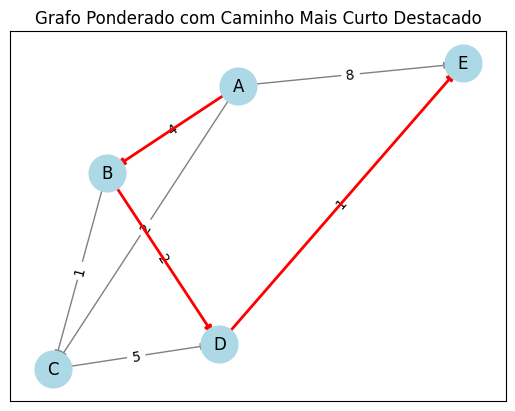

In [ ]:
# Implementação do Algoritmo de Dijkstra

class GrafoDijkstra:
    def __init__(self):
        self.grafo = nx.DiGraph()  # Digraph para permitir direções nos grafos ponderados

    def adiciona_aresta(self, u, v, peso):
        self.grafo.add_edge(u, v, weight=peso)

    def encontra_caminho_mais_curto(self, origem, destino):
        try:
            # Usa o algoritmo de Dijkstra para encontrar o caminho mais curto
            caminho = nx.dijkstra_path(self.grafo, source=origem, target=destino)
            return caminho
        except nx.NetworkXNoPath:
            print("Não há caminho entre", origem, "e", destino)
            return None

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Posições para todos os nós
        nx.draw_networkx_nodes(self.grafo, pos, node_color='lightblue', node_size=700)
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray', arrows=True)
        nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=nx.get_edge_attributes(self.grafo, 'weight'))
        nx.draw_networkx_labels(self.grafo, pos)

        if caminho:
            path_edges = list(zip(caminho, caminho[1:]))
            nx.draw_networkx_edges(self.grafo, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)

        plt.title('Grafo Ponderado com Caminho Mais Curto Destacado')
        plt.show()

# Exemplo de uso
grafo = GrafoDijkstra()
grafo.adiciona_aresta("A", "B", 4)
grafo.adiciona_aresta("B", "C", 1)
grafo.adiciona_aresta("A", "C", 2)
grafo.adiciona_aresta("C", "D", 5)
grafo.adiciona_aresta("B", "D", 2)
grafo.adiciona_aresta("A", "E", 8)
grafo.adiciona_aresta("D", "E", 1)

caminho = grafo.encontra_caminho_mais_curto("A", "E")
if caminho:
    print("Caminho mais curto de A para E:", caminho)
    grafo.plot_grafo(caminho)
else:
    print("Não foi possível encontrar um caminho mais curto.")


## Algoritmo de Floyd-Warshall

O Algoritmo de Floyd-Warshall é uma técnica fundamental na teoria dos grafos para encontrar os menores caminhos entre todos os pares de vértices em um grafo ponderado. Este algoritmo é particularmente útil em redes onde cada vértice representa um ponto e as arestas têm pesos que representam o custo para transitar de um ponto para outro. Aqui está uma visão mais detalhada sobre a teoria por trás deste algoritmo:

### Funcionamento Básico
O Algoritmo de Floyd-Warshall utiliza uma abordagem de programação dinâmica para calcular a matriz de distâncias mais curtas entre todos os pares de vértices em um grafo. A ideia básica é iterar sobre todos os vértices do grafo e considerar cada um deles como um "vértice intermediário" nas rotas potenciais entre cada par de outros vértices.

### Passos do Algoritmo
Inicialização:

 - Considere um grafo G(V,E) com um conjunto de vértices V e um conjunto de arestas E.
 - Defina uma matriz de distâncias D, onde D[i][j] representa o custo direto da aresta entre os vértices i e j se eles estiverem diretamente conectados por uma aresta, e ∞ (infinito) caso contrário. A diagonal principal da matriz, D[i][i], é inicializada com 0 para todos i, pois a distância de um vértice a ele mesmo é zero.

### Iteração:

 - Para cada vértice k (considerado como vértice intermediário):
  - Para cada par de vértices i e j:
    - Atualize a matriz de distâncias D[i][j] com:

       D[i][j]=min(D[i][j],D[i][k]+D[k][j])

    - Isso significa que o algoritmo verifica se o caminho direto de i a j é mais curto do que qualquer caminho que passe por k, e atualiza a matriz de distâncias de acordo.

 - Após as iterações, a matriz D conterá as distâncias mais curtas entre todos os pares de vértices.

### Complexidade e Características
  - Complexidade Temporal: O(n^3), onde n é o número de vértices no grafo. Isso decorre do fato de haver três laços aninhados, cada um iterando sobre o conjunto de vértices.
  - Complexidade Espacial: O(n^2) devido à necessidade de armazenar a matriz de distâncias.

### Vantagens e Desvantagens
   - Vantagens:
     - Simplicidade na implementação.
     - Capaz de processar grafos com arestas de peso negativo (desde que não contenham ciclos negativos acessíveis).
     - Fornece uma matriz completa de distâncias mais curtas, útil para várias aplicações subsequentes.
   - Desvantagens:
     - Não é eficiente para grafos esparso devido à sua complexidade cúbica.
     - Pode não ser prático para grafos muito grandes devido às exigências de memória e tempo.
### Aplicações

O Algoritmo de Floyd-Warshall é amplamente utilizado em áreas que requerem a análise de caminhos mínimos frequentemente, como em redes de transporte, telecomunicações, análise de redes sociais, e em algoritmos de roteamento de redes. Ele é particularmente valioso quando todas as distâncias inter-nodais são necessárias repetidamente, como em algoritmos de otimização e simulação.


Matriz de Distâncias:
A: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7caeb4a36050>, {'A': 0, 'B': 1, 'C': 3, 'D': 4})
B: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7caeb4a36200>, {'B': 0, 'C': 2, 'D': 3, 'A': 5})
C: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7caeb4a360e0>, {'C': 0, 'A': 3, 'D': 1, 'B': 4})
D: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7caeb4a36290>, {'D': 0, 'A': inf, 'B': inf, 'C': inf})
Caminho mais curto de A para D: ['A', 'B', 'C', 'D']


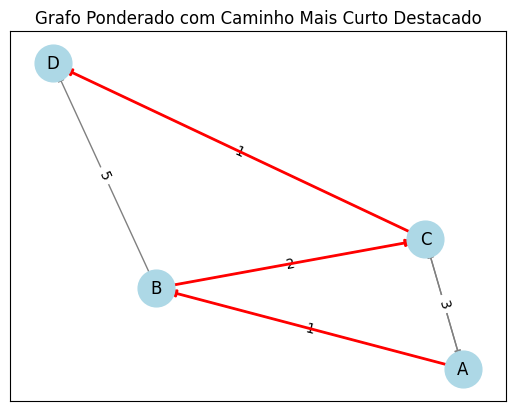

In [ ]:
# Implementação do Algoritmo de Floyd-Warshall
class GrafoFloydWarshall:
    def __init__(self):
        self.grafo = nx.DiGraph()  # DiGraph para permitir arestas dirigidas e ponderadas

    def adiciona_aresta(self, u, v, peso):
        self.grafo.add_edge(u, v, weight=peso)

    def floyd_warshall(self):
        # Floyd-Warshall algorithm to calculate the shortest paths between all pairs
        self.predecessor, self.dist = nx.floyd_warshall_predecessor_and_distance(self.grafo, weight='weight')
        return self.dist

    def reconstruir_caminho(self, origem, destino):
        # Rebuild the shortest path from the origin to the destination using the predecessor matrix
        path = []
        if origem not in self.predecessor or destino not in self.predecessor[origem]:
            return path
        at = destino
        while at != origem:
            path.append(at)
            at = self.predecessor[origem][at]
        path.append(origem)
        path.reverse()
        return path

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Positions for all nodes
        nx.draw_networkx_nodes(self.grafo, pos, node_color='lightblue', node_size=700)
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray', arrows=True)
        edge_labels = dict([((u, v,), f"{d['weight']}")
                            for u, v, d in self.grafo.edges(data=True)])
        nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(self.grafo, pos)

        if caminho:
            path_edges = list(zip(caminho, caminho[1:]))
            nx.draw_networkx_edges(self.grafo, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)

        plt.title('Grafo Ponderado com Caminho Mais Curto Destacado')
        plt.show()

# Exemplo de uso
grafo = GrafoFloydWarshall()
grafo.adiciona_aresta("A", "B", 1)
grafo.adiciona_aresta("B", "C", 2)
grafo.adiciona_aresta("A", "C", 4)
grafo.adiciona_aresta("C", "A", 3)
grafo.adiciona_aresta("B", "D", 5)
grafo.adiciona_aresta("C", "D", 1)

distancias = grafo.floyd_warshall()
print("Matriz de Distâncias:")
for key, value in distancias.items():
    print(f"{key}: {value}")

caminho = grafo.reconstruir_caminho("A", "D")
print("Caminho mais curto de A para D:", caminho)
grafo.plot_grafo(caminho)


Caminho mais curto de A para E: ['SIZ', 'RMA', 'CER', 'CRV', 'RBA']


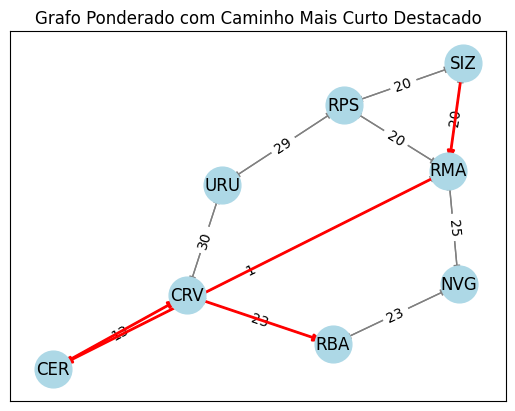

In [ ]:
# Implementação do Algoritmo de Dijkstra

class GrafoDijkstra:
    def __init__(self):
        #self.grafo = nx.Graph()  # Graph grafos ponderados não direcionados
        self.grafo = nx.DiGraph()  # Digraph para permitir direções nos grafos ponderados

    def adiciona_aresta(self, u, v, peso):
        self.grafo.add_edge(u, v, weight=peso)

    def encontra_caminho_mais_curto(self, origem, destino):
        try:
            # Usa o algoritmo de Dijkstra para encontrar o caminho mais curto
            caminho = nx.dijkstra_path(self.grafo, source=origem, target=destino)
            return caminho
        except nx.NetworkXNoPath:
            print("Não há caminho entre", origem, "e", destino)
            return None

    def plot_grafo(self, caminho=None):
        pos = nx.spring_layout(self.grafo)  # Posições para todos os nós
        nx.draw_networkx_nodes(self.grafo, pos, node_color='lightblue', node_size=700)
        nx.draw_networkx_edges(self.grafo, pos, edgelist=self.grafo.edges(), edge_color='gray', arrows=True)
        nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=nx.get_edge_attributes(self.grafo, 'weight'))
        nx.draw_networkx_labels(self.grafo, pos)

        if caminho:
            path_edges = list(zip(caminho, caminho[1:]))
            nx.draw_networkx_edges(self.grafo, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)

        plt.title('Grafo Ponderado com Caminho Mais Curto Destacado')
        plt.show()

# Exemplo de uso
grafo = GrafoDijkstra()
grafo.adiciona_aresta("CER", "RMA", 1)
grafo.adiciona_aresta("CER", "CRV", 13)
grafo.adiciona_aresta("RMA", "CER", 1)
grafo.adiciona_aresta("RMA", "RPS", 20)
grafo.adiciona_aresta("RMA", "SIZ", 20)
grafo.adiciona_aresta("RMA", "NVG", 25)
grafo.adiciona_aresta("NVG", "RBA", 23)
grafo.adiciona_aresta("NVG", "RMA", 25)
grafo.adiciona_aresta("CRV", "RBA", 20)
grafo.adiciona_aresta("CRV", "CER", 13)
grafo.adiciona_aresta("CRV", "URU", 30)
grafo.adiciona_aresta("URU", "RPS", 29)
grafo.adiciona_aresta("URU", "CRV", 30)
grafo.adiciona_aresta("RBA", "NVG", 23)
grafo.adiciona_aresta("RBA", "CRV", 23)
grafo.adiciona_aresta("SIZ", "RMA", 20)
grafo.adiciona_aresta("SIZ", "RPS", 20)
grafo.adiciona_aresta("RPS", "SIZ", 20)
grafo.adiciona_aresta("RPS", "URU", 20)
grafo.adiciona_aresta("RPS", "RMA", 20)


caminho = grafo.encontra_caminho_mais_curto("SIZ", "RBA")
if caminho:
    print("Caminho mais curto de A para E:", caminho)
    grafo.plot_grafo(caminho)
else:
    print("Não foi possível encontrar um caminho mais curto.")
